# Le DataSet regroupe les données bancaires de 30 000 personnes de Avril 2005 à Septembre 2005 à Taiwan. Le but du programme est de déterminer avec le plus haut niveau de précision possible si un client va faire un défaut de paiement le mois prochain selon ses données passées.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('UCI_Credit_Card.csv',sep=',', encoding = "UTF-8")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

# On remarque que les proportions sont très inégales entre ceux qui font défaut et les autres. 22%/78%

In [5]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [6]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

# Les données sont complètes, il n'y a pas de valeurs nulles ou de valeurs manquantes

# Data Visualization :

In [8]:
labels_Sex_Edu_Mar = {"SEX" : {1 : "Male", 2 : "Female"}, "EDUCATION" :{1 : "Graduate school", 2 : "University", 3 : "High School", 4 :"Others", 5 : "Unknown", 6 : "Unknown", 0 : "Unknown"}, "MARRIAGE" :{0 : "Other" ,1 : "Married", 2 :"Single", 3 : "Other"}, "default.payment.next.month" :{0 : "No", 1 : "Yes"}}
df.replace(labels_Sex_Edu_Mar, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


# On remplace les valeurs numériques par leur sens réels pour que les graphiques soit plus clairs

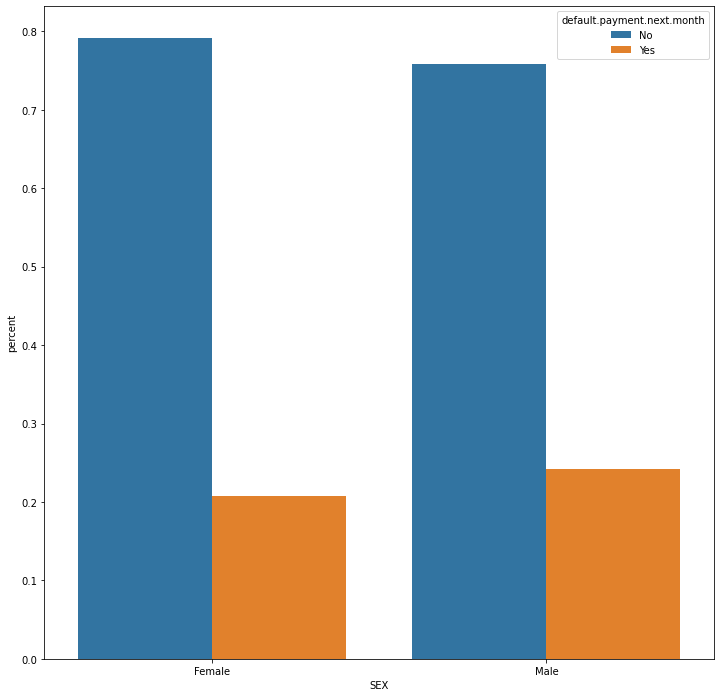

In [9]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['SEX','default.payment.next.month']).size() / df.groupby(['SEX']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='SEX', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

# Il n'y a pas de différence entre les hommes et les femmes pour la proportion de défaut de paiement

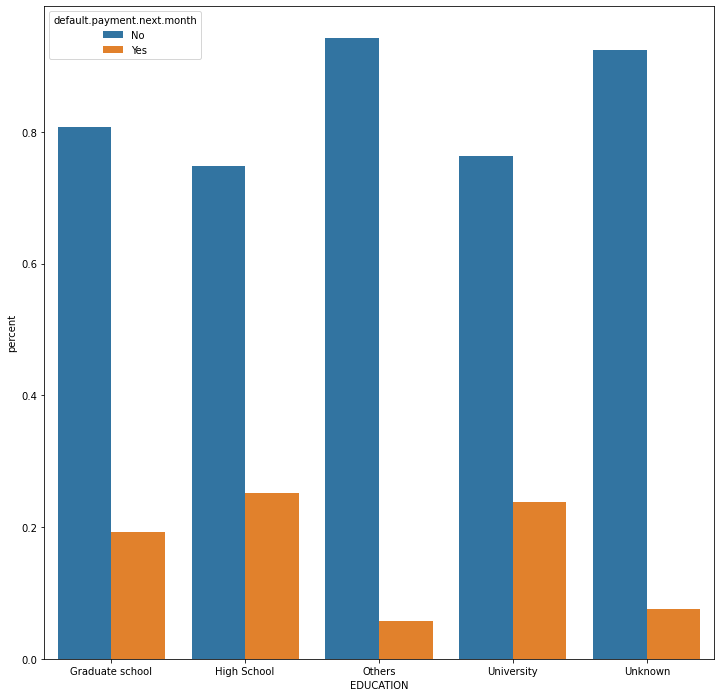

In [10]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['EDUCATION','default.payment.next.month']).size() / df.groupby(['EDUCATION']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='EDUCATION', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

# On peut remarquer que ce sont les moins éduqués qui font le moins de défaut. Cela peut s'expliquer par les prêts que contractent les étudiants pour leurs études, et ceux contractés par les diplômés pour entreprendre.

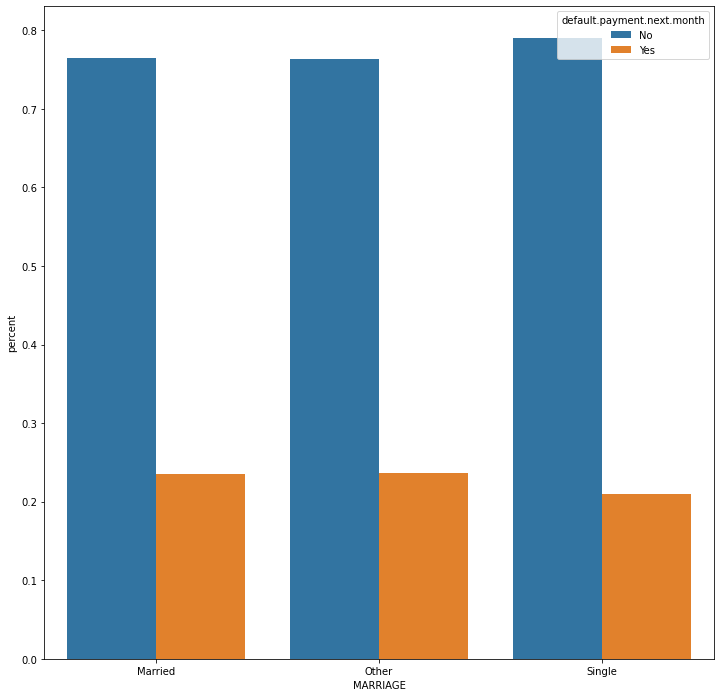

In [11]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['MARRIAGE','default.payment.next.month']).size() / df.groupby(['MARRIAGE']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='MARRIAGE', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

# Le statut marital n'a pas d'incidence sur la variable étudiée

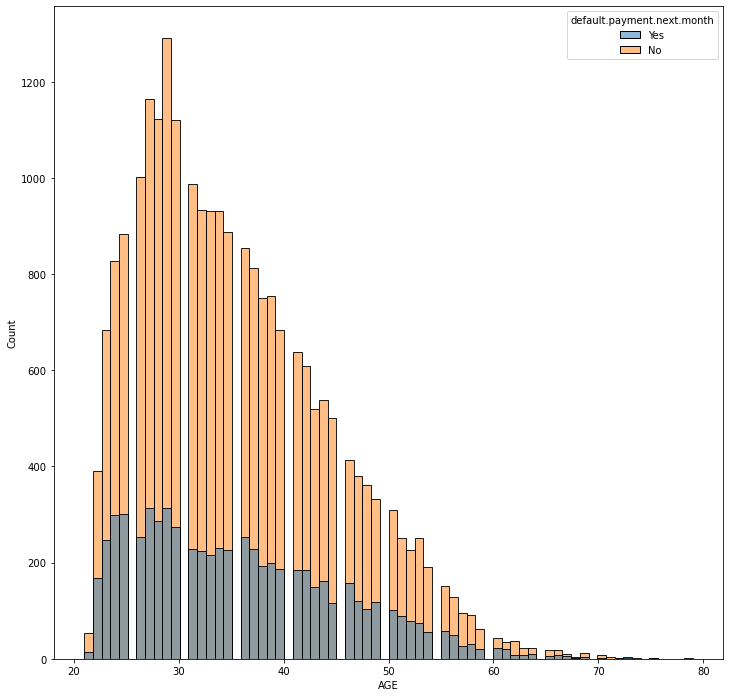

In [12]:
plt.figure(figsize =(12,12))
sns.histplot(x = 'AGE', hue = 'default.payment.next.month', data = df)
plt.show()

# Les 40 ans et plus semblent avoir plus de difficultés à payer leurs dettes

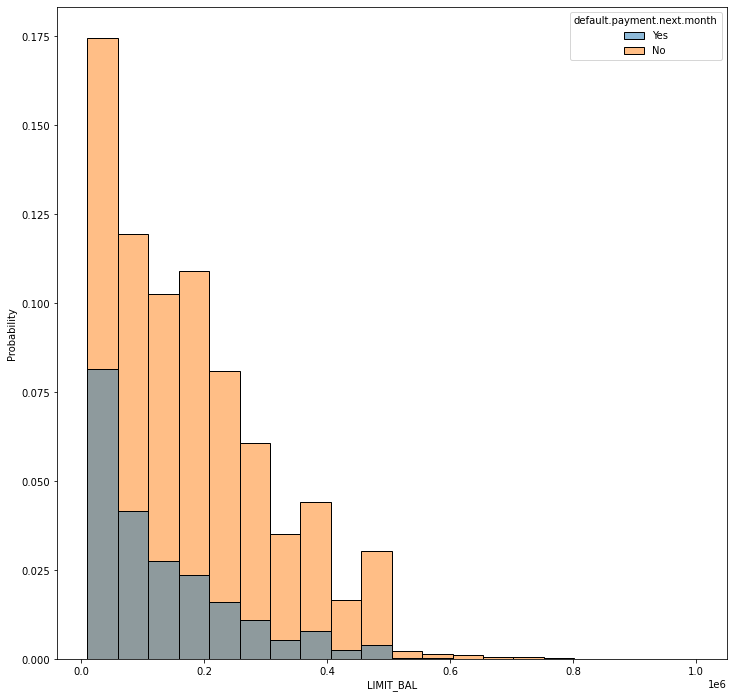

In [13]:
plt.figure(figsize =(12,12))
sns.histplot(x = 'LIMIT_BAL', hue = 'default.payment.next.month', data = df, bins = 20, stat = "probability")
plt.show()

# LIMIT_BAL représente la limite mensuelle de dépenses de la carte de crédit. Plus la limite est élevée, plus les revenus de la personne sont élevées donc plus elle est riche. On remarque à travers le graphique que plus la limite est élevée, plus le risque de défaut est faible puisque cela veut dire que les personnes sont riches.

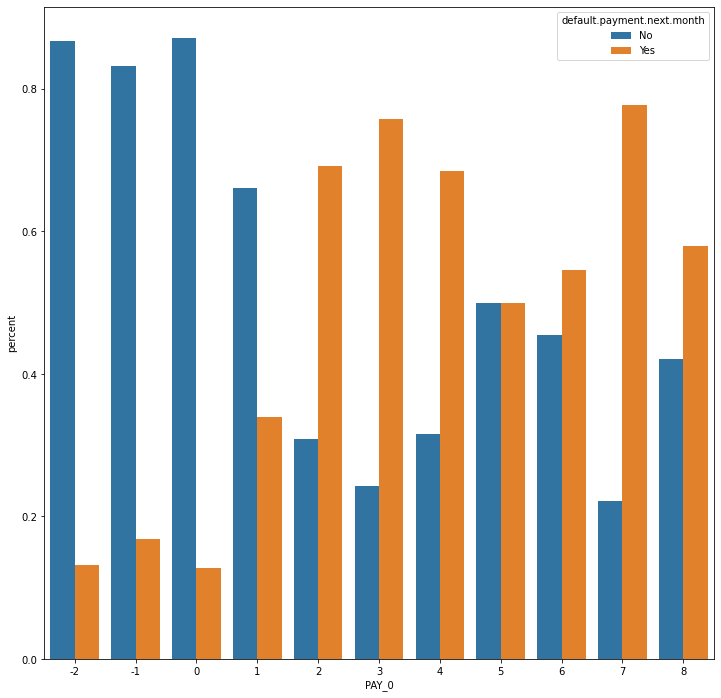

In [14]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['PAY_0','default.payment.next.month']).size() / df.groupby(['PAY_0']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='PAY_0', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

# Les colonnes PAY représentent le timing de paiement de la dette pour chaque mois. Plus le nombre est élevé, plus le client a du retard dans ses paiements et donc plus son risque de faire défaut est élevé ce qui est logique.

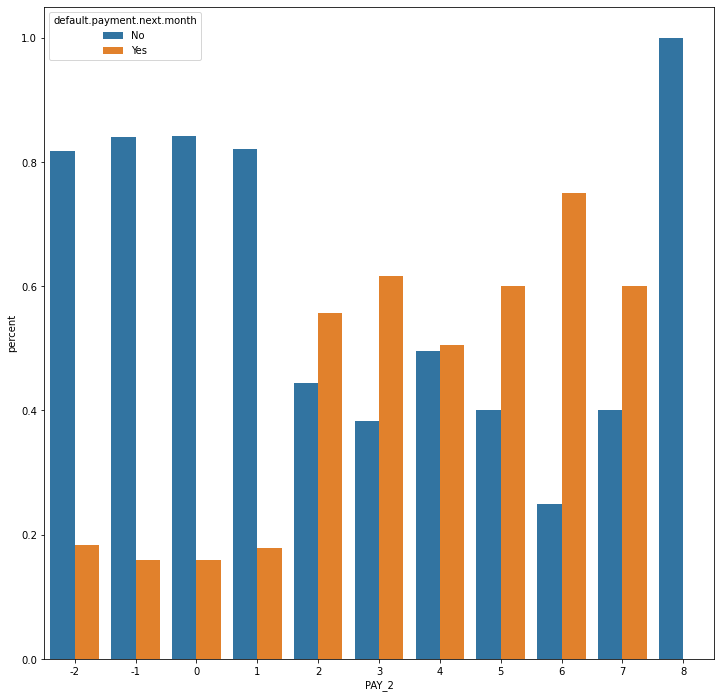

In [15]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['PAY_2','default.payment.next.month']).size() / df.groupby(['PAY_2']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='PAY_2', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

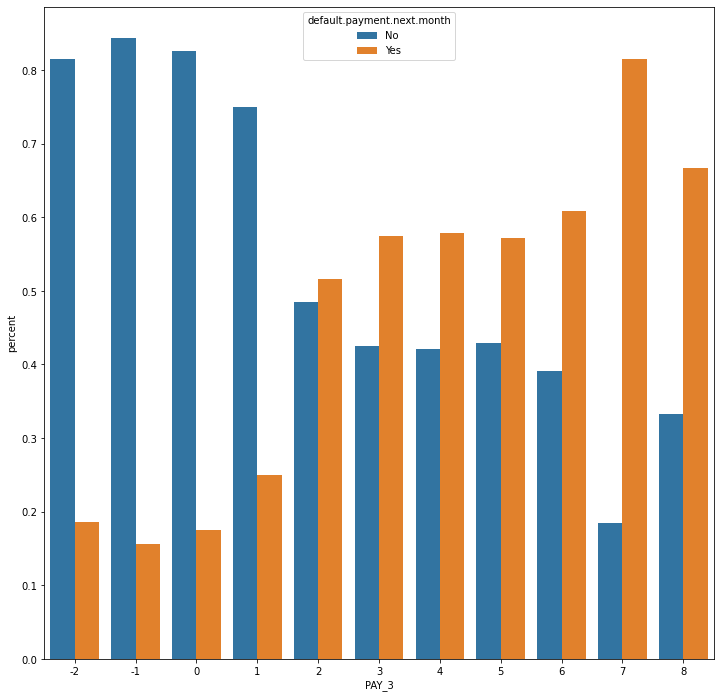

In [16]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['PAY_3','default.payment.next.month']).size() / df.groupby(['PAY_3']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='PAY_3', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

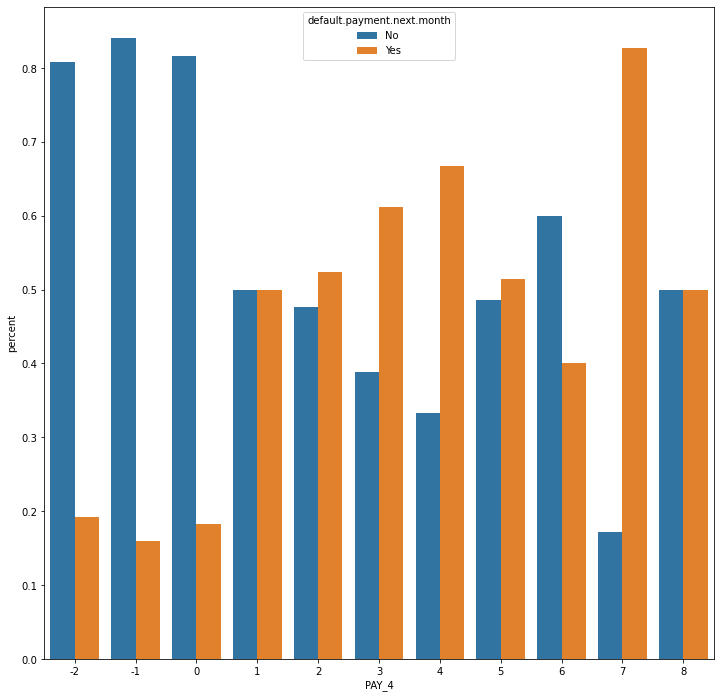

In [17]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['PAY_4','default.payment.next.month']).size() / df.groupby(['PAY_4']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='PAY_4', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

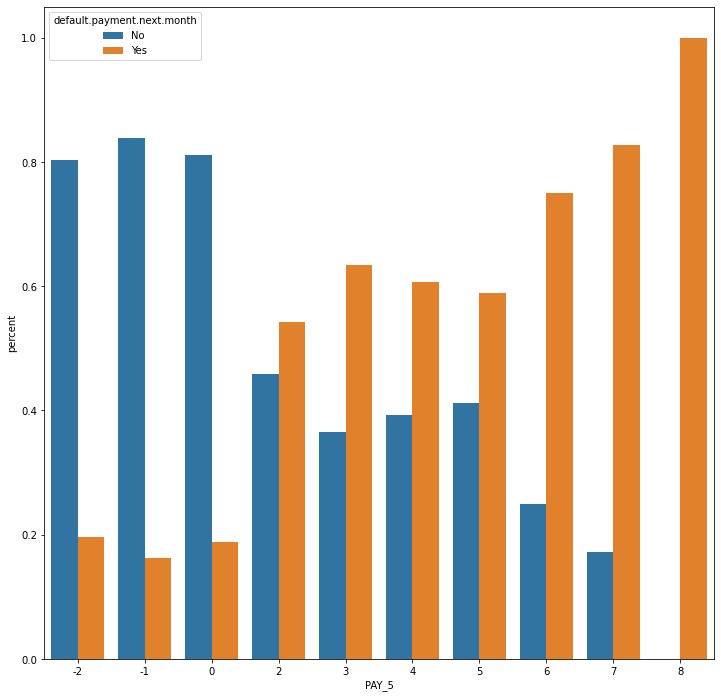

In [18]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['PAY_5','default.payment.next.month']).size() / df.groupby(['PAY_5']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='PAY_5', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

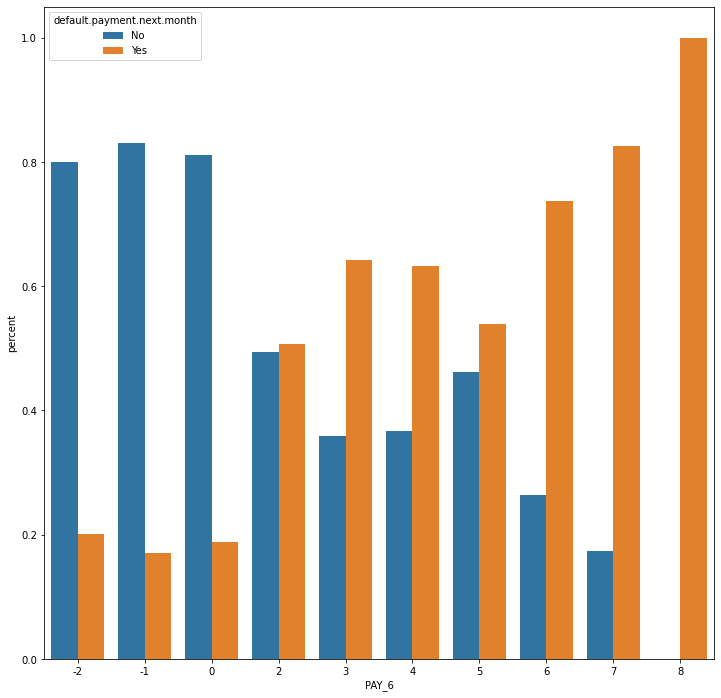

In [19]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['PAY_6','default.payment.next.month']).size() / df.groupby(['PAY_6']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='PAY_6', hue='default.payment.next.month', y='percent', data=pct2)
plt.show()

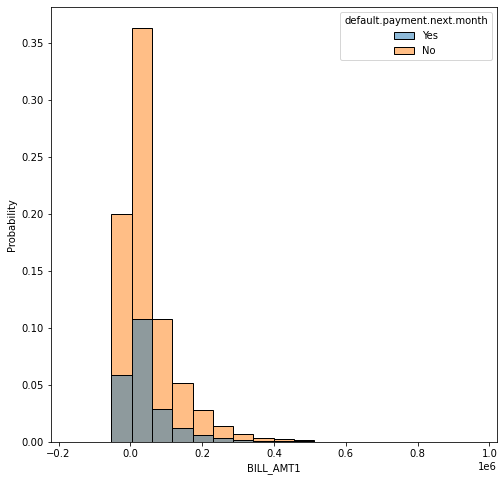

In [20]:
plt.figure(figsize=(8,8))
sns.histplot(x='BILL_AMT1', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

# Les colonnes BILL_AMT représentent les factures mensuelles des clients. Cela ne semble pas avoir d'incidence sur le risque de faire défaut  puisque les barres de l'histogramme suivent la même courbe de tendance.

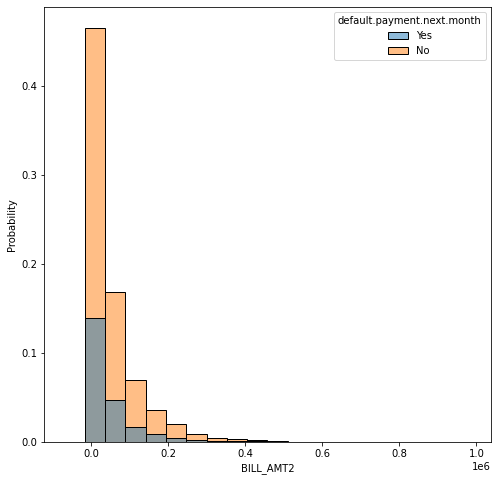

In [21]:
plt.figure(figsize=(8,8))
sns.histplot(x='BILL_AMT2', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

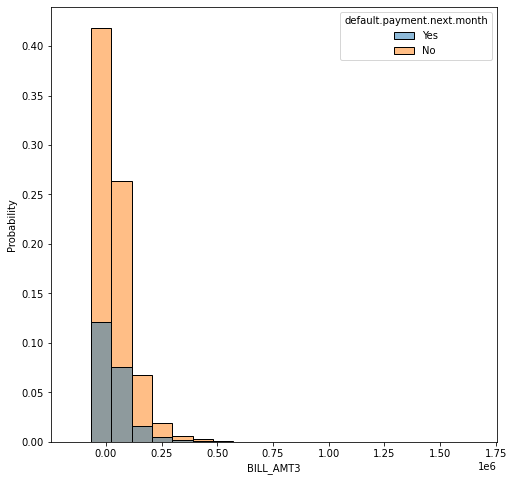

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(x='BILL_AMT3', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

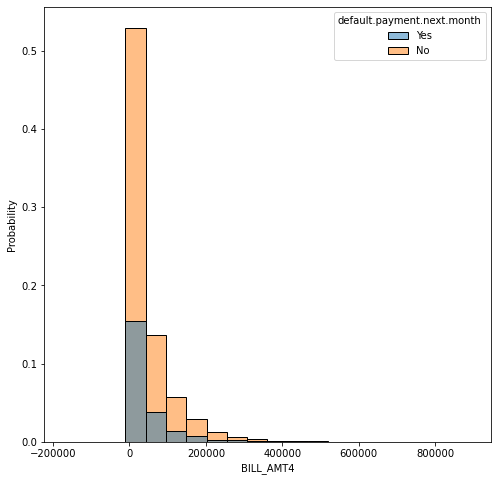

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(x='BILL_AMT4', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

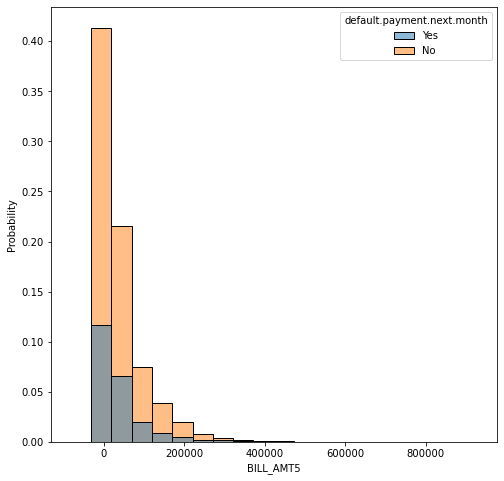

In [24]:
plt.figure(figsize=(8,8))
sns.histplot(x='BILL_AMT5', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

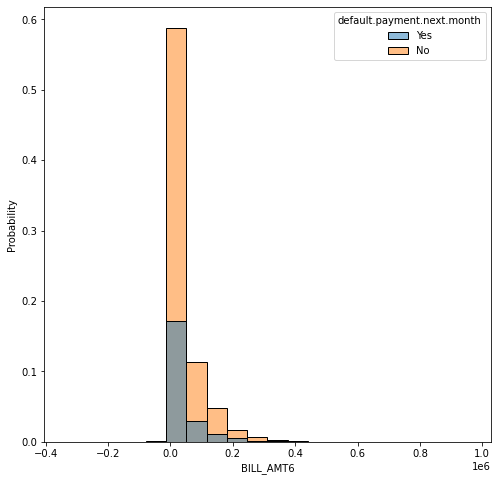

In [25]:
plt.figure(figsize=(8,8))
sns.histplot(x='BILL_AMT6', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

In [26]:
df = df[df.BILL_AMT1>= 0]
df = df[df.BILL_AMT2>= 0]
df = df[df.BILL_AMT3>= 0]
df = df[df.BILL_AMT4>= 0]
df = df[df.BILL_AMT5>= 0]
df = df[df.BILL_AMT6>= 0]

# On élimine les valeurs aberrantes que sont les factures à solde négatif

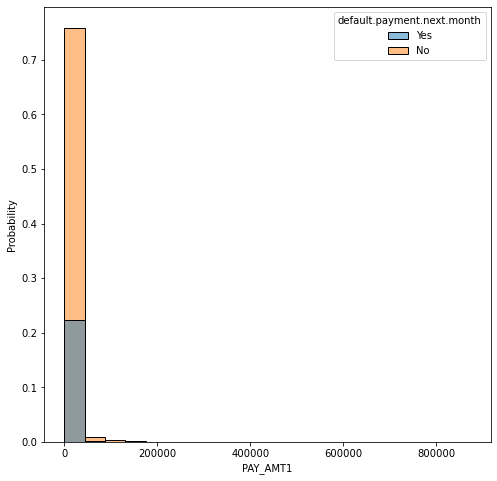

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(x='PAY_AMT1', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

# Les colonnes PAY_AMT représentent les paiement effectués par chaque client chaque mois. Puisque plus de 75% des clients payent plus ou moins la même chose, la variable n'est pas très impactante. En effet, les dépenses correspondent très souvent aux revenues et il est difficile d'en tirer une corrélation avec le risque de défaut de paiement.

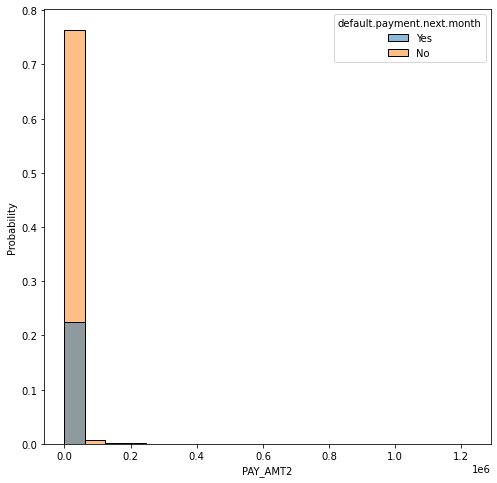

In [28]:
plt.figure(figsize=(8,8))
sns.histplot(x='PAY_AMT2', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

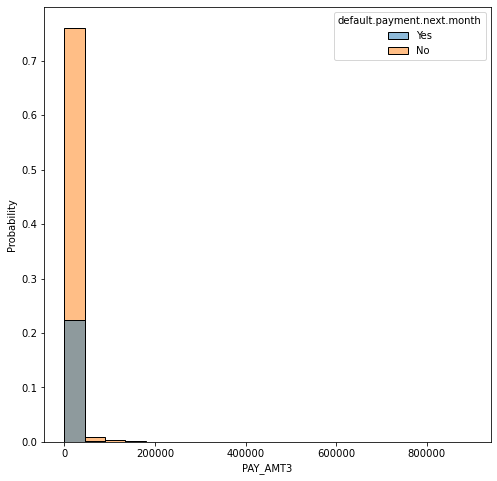

In [29]:
plt.figure(figsize=(8,8))
sns.histplot(x='PAY_AMT3', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

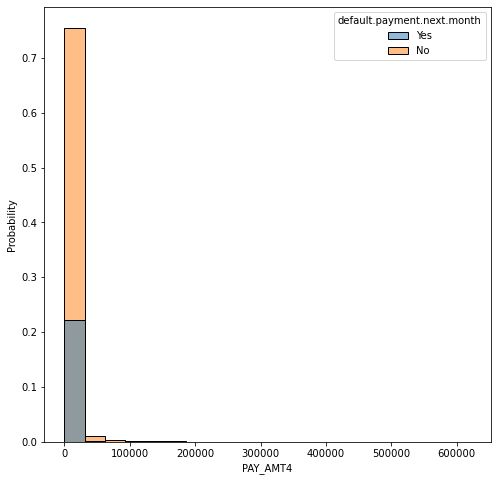

In [30]:
plt.figure(figsize=(8,8))
sns.histplot(x='PAY_AMT4', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

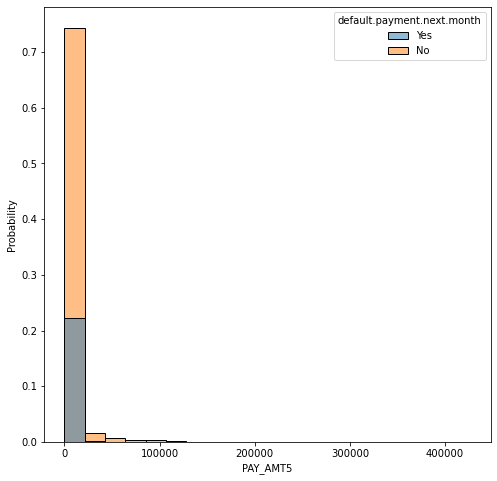

In [31]:
plt.figure(figsize=(8,8))
sns.histplot(x='PAY_AMT5', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

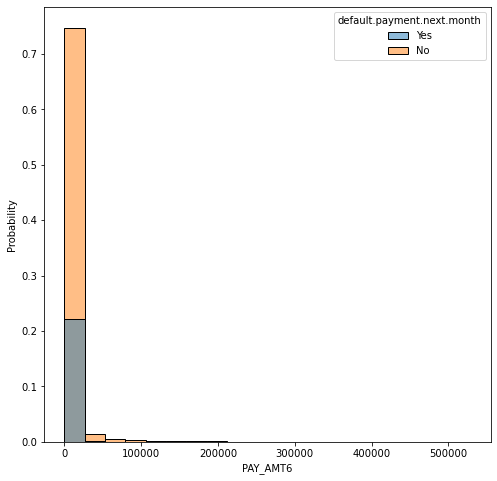

In [32]:
plt.figure(figsize=(8,8))
sns.histplot(x='PAY_AMT6', hue='default.payment.next.month', data=df, bins = 20, stat = "probability")
plt.show()

# On retransforme les données catégoriques en données numériques.

In [33]:
labels_Sex_Edu_Mar = {"SEX" : {"Male" : 1,"Female" : 2}, "EDUCATION" :{"Graduate school" : 1, "University" : 2,"High School" : 3,"Others" : 4,"Unknown" : 5}, "MARRIAGE" :{"Other" : 0 ,"Married" : 1,"Single" : 2}, "default.payment.next.month" :{"No" : 0, "Yes" : 1}}
df.replace(labels_Sex_Edu_Mar, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Il m'a paru pertinent de transformer les données des factures en un ratio qui calcule la différence entre la limite mensuelle et la facture mensuelle. Plus le ratio est proche de 0, plus le client est proche de la limite. Si le ratio est négatif, cela veut dire que la facture du mois est supérieur à la limite et que le client a donc des impayés des mois précédents.

In [34]:
df['Diff6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Diff5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Diff4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Diff3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Diff2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Diff1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df['Diff_Mean'] = (df.Diff1 + df.Diff2 + df.Diff3 + df.Diff4 + df.Diff5 +df.Diff6)/6
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,Diff6,Diff5,Diff4,Diff3,Diff2,Diff1,Diff_Mean
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,1,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350,0.935800
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,2000.0,1,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650,0.976282
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,5000.0,0,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122,0.811754
3,4,50000.0,2,2,1,37,0,0,0,0,...,1069.0,1000.0,0,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200,0.228887
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,689.0,679.0,0,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660,0.635537


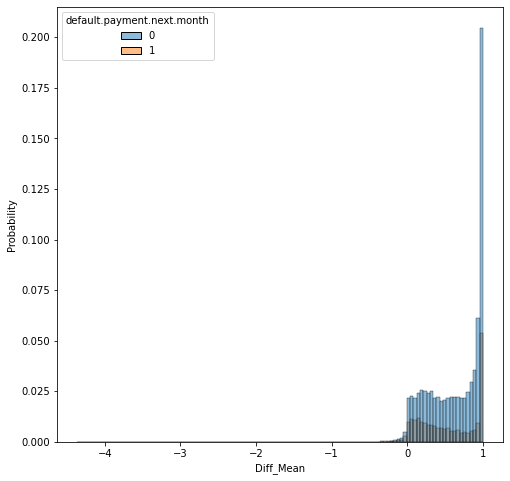

In [35]:
plt.figure(figsize=(8,8))
sns.histplot(x='Diff_Mean', hue='default.payment.next.month', data=df, stat = "probability")
plt.show()

# Les clients qui ont un ratio proche de 0 ont plus de chances de faire défaut, et ceux qui ont un ratio négatif ont des impayés des mois précédents qui se répercutent sur la facture du mois ce qui est donc un signe d'un risque élevé de défaut.

In [36]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 23 , 23 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

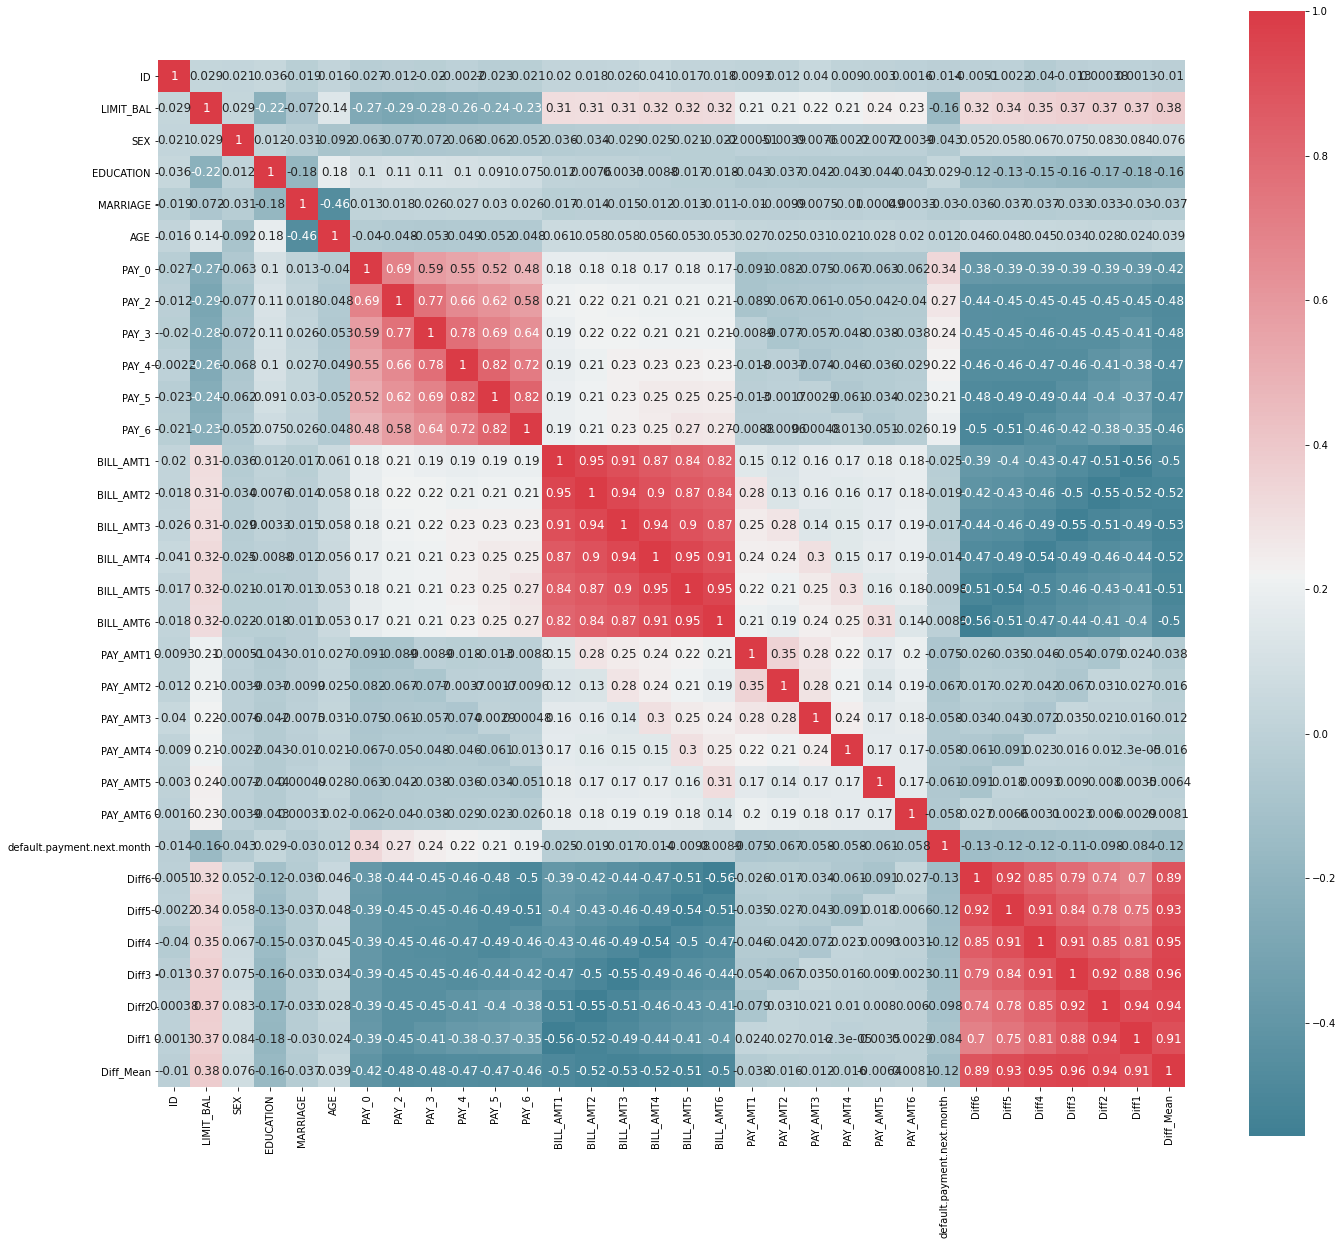

In [37]:
plot_correlation_map(df)

# La correlation heatmap ne révelent pas de corrélation linéaire entre les différentes variables et le risque de défaut de paiement.

# Test de différents modèles :

# Pour les variables explicatives, on retiendra l'éducation, l'age, la limite bancaire, les PAY et les Diff.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy=0.81
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6505
           1       0.71      0.24      0.36      1916

    accuracy                           0.81      8421
   macro avg       0.76      0.61      0.62      8421
weighted avg       0.79      0.81      0.77      8421



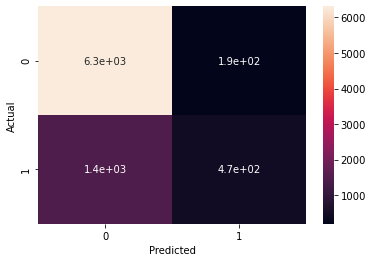

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


x = df[['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Diff1', 'Diff2', 'Diff3', 'Diff4', 'Diff5', 'Diff6', 'Diff_Mean']]
y = df['default.payment.next.month']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))


# La régression logistique donnent une bonne précision mais un nombre très élevé de faux négatifs ce qui posent un problème pour l'efficacité du modèle. En effet, un faux positif ne provoquera qu'un traitement supplémentaire du client non nécessaire alors qu'un faux négatif fera penser à la banque que le client est quelqu'un de confiance alors qu'il aura un défaut de paiement le mois prochain. On doit donc essayer d'améliorer au mieux ce ratio.

In [39]:
x = df[['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Diff1', 'Diff2', 'Diff3', 'Diff4', 'Diff5', 'Diff6', 'Diff_Mean', 'LIMIT_BAL']]
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.81
Accuracy for k= 2 is: 0.81
Accuracy for k= 3 is: 0.81
Accuracy for k= 4 is: 0.81
Accuracy for k= 5 is: 0.81
Accuracy for k= 6 is: 0.81
Accuracy for k= 7 is: 0.81
Accuracy for k= 8 is: 0.8
Accuracy for k= 9 is: 0.81
Accuracy for k= 10 is: 0.81
Accuracy for k= 11 is: 0.81
Accuracy for k= 12 is: 0.81
Accuracy for k= 13 is: 0.81
Accuracy for k= 14 is: 0.81
Accuracy for k= 15 is: 0.81
Accuracy for k= 16 is: 0.8
Accuracy for k= 17 is: 0.8
Accuracy for k= 18 is: 0.8
Accuracy for k= 19 is: 0.8
Accuracy for k= 20 is: 0.8
Accuracy for k= 21 is: 0.8
Accuracy for k= 22 is: 0.8
Accuracy for k= 23 is: 0.8
Accuracy for k= 24 is: 0.8
Accuracy for k= 25 is: 0.79
Accuracy for k= 26 is: 0.79
Accuracy for k= 27 is: 0.78
Accuracy for k= 28 is: 0.78
Accuracy for k= 29 is: 0.73


Accuracy= 0.7887424296401853
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      6505
           1       0.61      0.20      0.30      1916

    accuracy                           0.79      8421
   macro avg       0.71      0.58      0.59      8421
weighted avg       0.76      0.79      0.74      8421



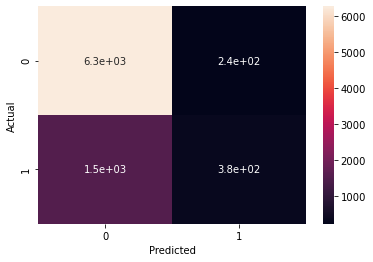

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

knn=KNeighborsClassifier(n_neighbors=15) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)  
print('Accuracy=',accuracy_score(y_pred,y_test))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))


# Le modèle KNN a les mêmes problèmes.

score:0.725210782567391
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6505
           1       0.40      0.40      0.40      1916

    accuracy                           0.73      8421
   macro avg       0.61      0.61      0.61      8421
weighted avg       0.73      0.73      0.73      8421



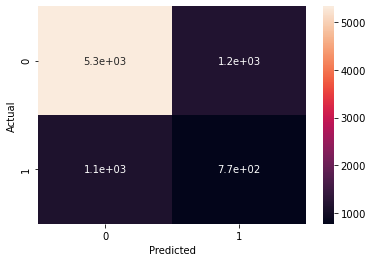

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=0)


tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))


# Avec Decision Tree, on perd en précision global mais le taux de faux négatifs s'améliore.

Accuracy: 0.8020425127657048
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6505
           1       0.62      0.34      0.44      1916

    accuracy                           0.80      8421
   macro avg       0.72      0.64      0.66      8421
weighted avg       0.78      0.80      0.78      8421



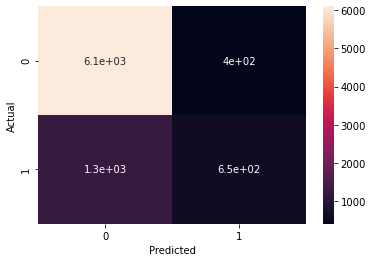

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=0)
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))


# RandomForest est le meilleur compromis entre une haute précision et un recall moins mauvais que les autres.

In [43]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('clf',RandomForestClassifier(n_estimators=100)))  
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# On essaye maintenant de stack les différents modèles pour augmenter la précision.

Accuracy: 0.810711316945731
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6505
           1       0.66      0.35      0.46      1916

    accuracy                           0.81      8421
   macro avg       0.75      0.65      0.67      8421
weighted avg       0.79      0.81      0.79      8421



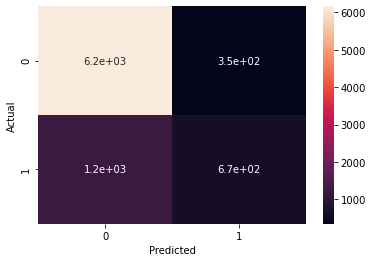

In [44]:
x = df[['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Diff_Mean', 'LIMIT_BAL', 'Diff1', 'Diff2', 'Diff3', 'Diff4', 'Diff5', 'Diff5']]
y = df['default.payment.next.month']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  
stack=get_stacking() 
stack.fit(x_train, y_train)  
y_pred=stack.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))

 # La précision augmente mais le recall reste très bas.

# Les problèmes de recall sont souvent liés à des données déséquilibrées en proportion. On essaye donc palier à ce problème avec le SMOTE : Syntethic Minority Over-Sampling Technique, qui va créer de nouvelles lignes de données cohérentes appartenant à la classe sous-représenté des défauts de paiement en s'inspirant des patterns du dataset.

In [45]:
x = df[['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Diff_Mean', 'LIMIT_BAL','MARRIAGE', 'Diff1', 'Diff2', 'Diff3', 'Diff4', 'Diff5', 'Diff6']]
y = df['default.payment.next.month']

sm = SMOTE(random_state=0)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

NameError: name 'SMOTE' is not defined

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)  
stack=get_stacking() 
stack.fit(x_train, y_train)  
y_pred=stack.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))

# Avec le SMOTE, la précision reste stable mais le recall et donc le taux de faux négatifs s'améliore énormement ce qui rend le modèle beaucoup plus efficace. Ainsi, avec le stacking, on obtient une haute précision et un bon recall. Une banque pourrait donc facilement adapter le projet à ses données afin de détecter les risques de défauts de paiement avec une grande fiabilité.